Use Credit Card dataset and perform the following:

a) Implement Pre-processing functions

- Check for NULL values in the dataset. If any NULL value is present then treat it accordingly.

- extract only feature columns from the dataset.

b) Determine the number of clusters using dendogram. Use ward linkage method.

c) Apply agglomerative clustering using ward linkage method.

d) Form the clusters.

e) Visualize the clusters formed by agglomerative clustering.

d) Evaluate the quality of clusters.


In [17]:
#importing credit card dataset
import pandas as pd 
import matplotlib.pyplot as plt 
creditdf=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Creditcard_Dataset.csv') 

In [18]:
creditdf.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
#checking for NULL values
creditdf.isnull().sum().sort_values(ascending=False) 

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [20]:
#treating missing values
creditdf=creditdf.fillna(creditdf.median())
creditdf=creditdf.drop(columns=['CUST_ID'])

In [23]:
#standardizing features
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler() 
creditdf_scaled=ss.fit_transform(creditdf) 

In [29]:
#reducing dimensions
from sklearn.decomposition import PCA 
pca=PCA(n_components=10,random_state=0) 
X=pca.fit(creditdf_scaled) 

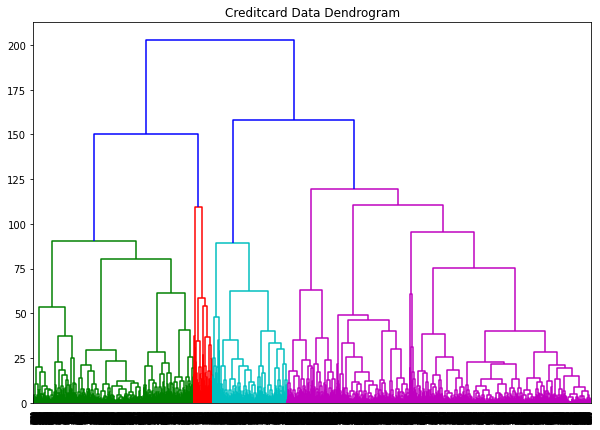

In [30]:
#plotting dendrogram to determine number of clusters
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10,7)) 
plt.title("Creditcard Data Dendrogram") 
dend1=shc.dendrogram(shc.linkage(creditdf_scaled,method='ward'))

In [31]:
#implementing agglomerative clustering
from sklearn.cluster import AgglomerativeClustering 
cluster=AgglomerativeClustering(n_clusters=4,linkage='ward')

In [32]:
#forming clusters
cluster.fit(creditdf_scaled) 
labels=cluster.labels_ 

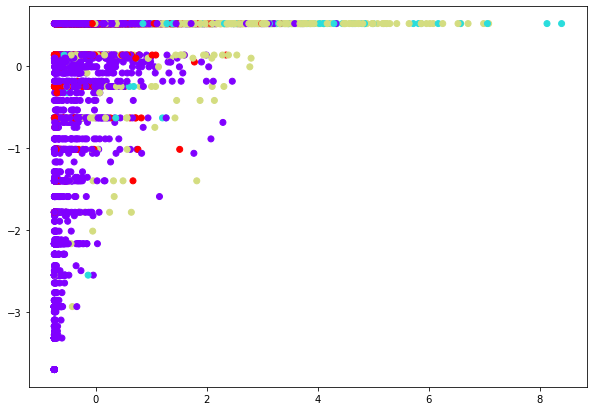

In [33]:
#visualizing the clusters
plt.figure(figsize=(10,7)) 
plt.scatter(creditdf_scaled[:,0],creditdf_scaled[:,1],c=cluster.fit_predict(creditdf_scaled), cmap='rainbow') 

In [35]:
#evaluating the quality of clusters
from sklearn.metrics import silhouette_score 
silhoutte_scr=silhouette_score(creditdf_scaled,cluster.labels_) 
print("For n_clusters =", 4, "\nAverage Silhoutte Score =",round(silhoutte_scr,4)) 

For n_clusters = 4 
Average Silhoutte Score = 0.1598
